## Coding Exercise #0511

In [1]:
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')               # Turn the warnings off.
# nltk.download('stopwords')

### 1. NLP classification analysis:

#### 1.1. Read in data:
Movie review data from Cornell CS department. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [2]:
# Specify the folder and read in the subfolders.
reviews = load_files('txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [3]:
len(my_docs)

1366

In [4]:
np.unique(y, return_counts=True)

(array([0, 1]), array([666, 700], dtype=int64))

In [5]:
y

array([1, 0, 1, ..., 1, 0, 1])

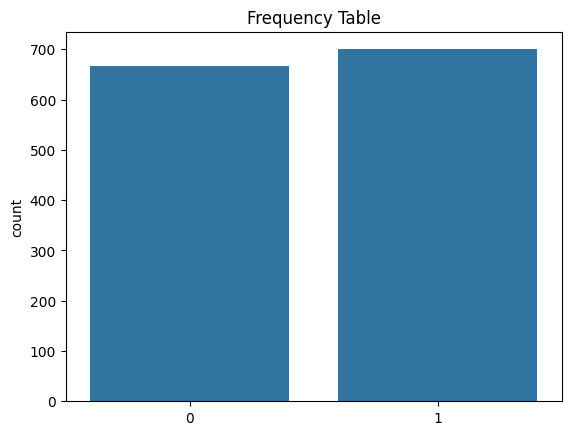

In [6]:
# Visualize the response variable.
sns.countplot(x=y).set_title("Frequency Table")
plt.show()

#### 1.2. Data pre-processing:

In [7]:
corpus = []
for i in range(0, len(my_docs)):
    review = re.sub(r'\W', ' ', str(my_docs[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)               # Remove the excess white spaces introduced in the previous steps.
    corpus.append(review)  

In [8]:
# Just show a document.
corpus[0]

'bob the happy bastard quickie review must admit no doubt single new is quite catchy it was bouncy and energetic enough to get me to go see this new film from director doug limon the man who had brought us the humorous swingers little while back the result movie that just as good as that song really it follows the lives of several individuals over the course of one weekend first we hear about grocery bagger sara polley who runs into monetary situation problem and ends up selling bogus drugs at rave with bad results as drug dealer feels he been swindled by her then comes the story of an english grocery store worker same store who heads to vegas for the weekend with friends where sex gunplay and stolen car trouble come into play then we see the story of two gay movie actors played by scott wolf and jay mohr who deal with cop strange insurance presentation and hitting girl sara with their car and finally we come to another grocery worker katie holmes who has strange fascination with said 

#### 1.3. Create a TF IDF representation:

In [9]:
TFIDF = TfidfVectorizer(max_features = 1000, min_df = 2, max_df = 0.6, stop_words = stopwords.words('english'))
TFIDF.fit(corpus)                                          # Create a TF IDF model. 
X = TFIDF.transform(corpus).toarray()
X.shape

(1366, 1000)

#### 1.4. Logistic regression training and testing:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [11]:
np.unique(y_train, return_counts=True)


(array([0, 1]), array([475, 481], dtype=int64))

In [12]:
# Training.
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Testing.
y_pred = LR.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [14]:
# Confusion matrix.
print(conf_mat)

[[187   4]
 [  0 219]]


In [15]:
# Accuracy.
print(np.round(acc,3))

0.99
